<a href="https://colab.research.google.com/github/krishnakaushik25/abaloneage_prediction/blob/master/age_of_an_abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task**
Predict the age of abalone from physical measurements only.

**Problem**
Typically, the age of an abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. This process is tedious and time-consuming.

**Solution**
Create a machine learning algorithm that will predict the age of an abalone from physical measurements only.

**Dataset information**
8 attributes
4177 instances
Sex: nominal - M (male), F (female), I (infant)

Length: continuous - longest shell measurement (in mm)

Diameter: continuous - measurement perpendicular to legnth (in mm)

Height: continuous - with meat in shell (in mm)

Whole weight: continuous - the whole abalone (in grams)

Shucked weight: continuous - weight of the meat (in grams)

Viscera weight: continuous - gut weight after bleeding (in grams)

Shell weight: continuous - after being dried (in grams)

Rings: integer - +1.5 gives the age in years

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas_profiling import ProfileReport

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
!pip install pandas-profiling==2.7.1
DATAPATH = '/content/abolone.data'

data = pd.read_csv(DATAPATH, header=None, index_col=False)
data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

data.head()

sex  length  diameter  ...  viscera_weight  shell_weight  rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]

In [ ]:
profile = ProfileReport(data)
profile

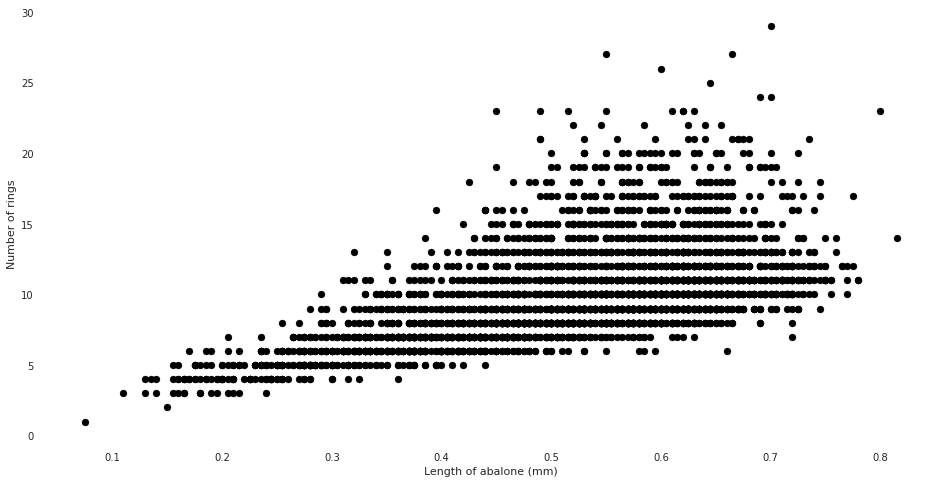

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(data['length'], data['rings'], c='black')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

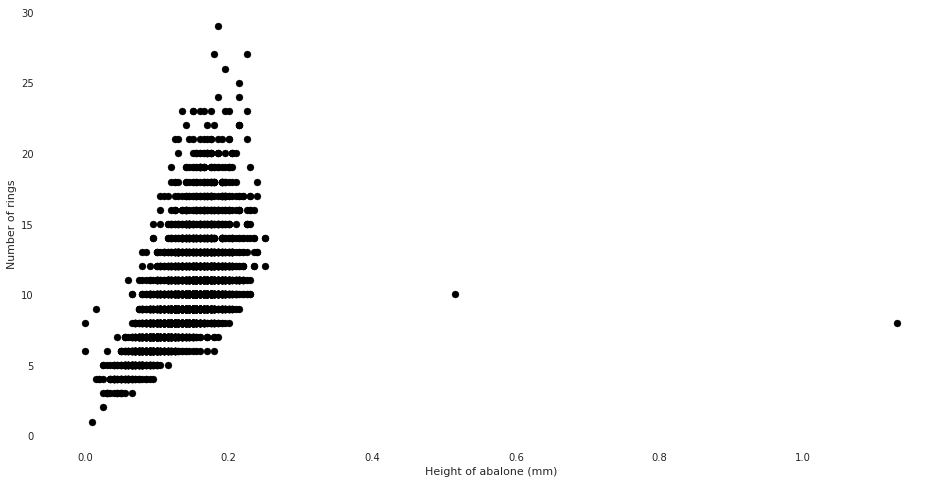

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(data['height'], data['rings'], c='black')
plt.xlabel('Height of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

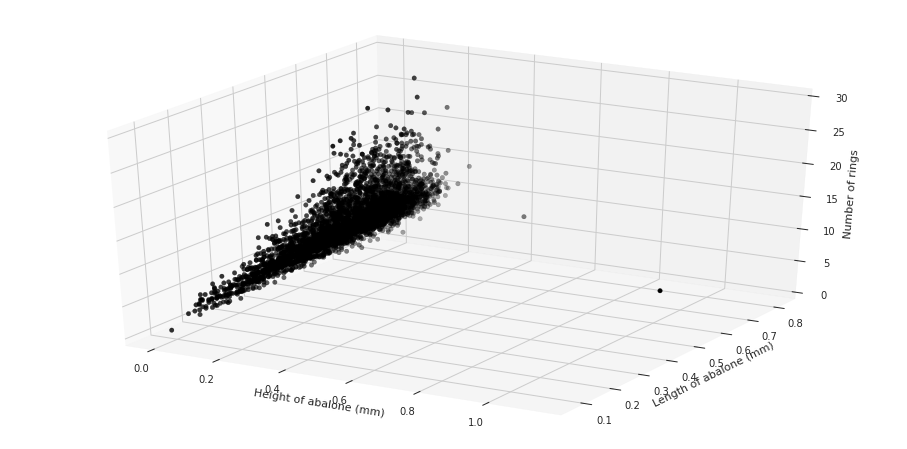

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.set_zlabel('Number of rings')
ax.scatter3D(data['height'], data['length'], data['rings'], c='black');

plt.show()

In [ ]:
encoded_data = pd.get_dummies(data)
encoded_data.head()

print(encoded_data.shape)

(4177, 11)


In [ ]:
training_set = encoded_data.iloc[:4099, :]
validation_set = encoded_data.iloc[4099:, :]

print(validation_set.shape)
print(training_set.shape)

(78, 11)
(4099, 11)


In [ ]:
X = training_set[['length', 'height']]
y = training_set['rings'].values.reshape(-1, 1)

X_val = validation_set[['length', 'height']]
y_val = validation_set['rings'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg_pred = lin_reg.predict(X_test)

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

# Validation set RMSE
lin_reg_pred_val = lin_reg.predict(X_val)
val_rmse = mean_squared_error(lin_reg_pred_val, y_val, squared=False)

print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.5679099174951547
Validation RMSE: 1.566178378231162


Multiple linear regression with regularization (ridge regression)


In [ ]:
ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_root_mean_squared_error', cv=5)

ridge_regressor.fit(X_train, y_train);

print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 1}
2.6564563658448885


In [ ]:

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

ridge_reg_pred = ridge_reg.predict(X_test)

# Test RMSE
test_rmse = mean_squared_error(y_test, ridge_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

# Validation RMSE
ridge_reg_pred_val = ridge_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, ridge_reg_pred_val, squared=False)

print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.5871300097108296
Validation RMSE: 1.5640813253014876


Multiple linear regression with regularization (lasso)

In [ ]:
lasso = Lasso(tol=0.05)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 0.01}
7.130917624445476


In [ ]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

lasso_reg_pred = lasso_reg.predict(X_test)

# Test RMSE
test_rmse = mean_squared_error(y_test, lasso_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

# Validation RMSE
lasso_reg_pred_val = lasso_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, lasso_reg_pred_val, squared=False)

print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.610473125813745
Validation RMSE: 1.5563831232308802


In [ ]:
X = training_set.drop(['rings' ,'diameter', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight'], axis=1)
y = training_set['rings'].values.reshape(-1, 1)

X_val = validation_set.drop(['rings' ,'diameter', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight'], axis=1)
y_val = validation_set['rings'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
rf = RandomForestRegressor()

parameters = {'n_estimators': [int(x) for x in np.linspace(100, 1000, 10)]}

rf_regressor = GridSearchCV(rf, parameters, scoring='neg_mean_squared_error', cv=5)
rf_regressor.fit(X_train, y_train.ravel())

print(rf_regressor.best_params_)
print(-rf_regressor.best_score_)

{'n_estimators': 300}
8.389352460672011


In [ ]:

rf_reg = RandomForestRegressor(n_estimators=300)
rf_reg.fit(X_train, y_train.ravel())

rf_reg_pred = rf_reg.predict(X_test)

# Test RMSE
test_rmse = mean_squared_error(y_test, rf_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

# Validation RMSE
rf_reg_pred_val = rf_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, rf_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.650539574554867
Validation RMSE: 2.255218308240747


In [ ]:
bg = BaggingRegressor()

parameters = {
    'n_estimators': [int(x) for x in np.linspace(10, 1000, 10)],
    'max_samples': [float(x) for x in np.arange(0.1, 1.1, 0.1)],
}

bg_regressor = GridSearchCV(bg, parameters, scoring='neg_mean_squared_error', cv=5)
bg_regressor.fit(X_train, y_train.ravel())

print(bg_regressor.best_params_)
print(-bg_regressor.best_score_)

{'max_samples': 0.1, 'n_estimators': 560}
6.564739384466668


In [ ]:
bg_reg = BaggingRegressor(n_estimators=450, max_samples=0.1)
bg_reg.fit(X_train, y_train.ravel())

bg_reg_pred = rf_reg.predict(X_test)

# Test RMSE
test_rmse = mean_squared_error(y_test, bg_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

# Validation RMSE
bg_reg_pred_val = rf_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, bg_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.650539574554867
Validation RMSE: 2.255218308240747


In [ ]:
params = {
    'learning_rate': '0.01'
}

train_data = lgb.Dataset(X_train.values, label=y_train.ravel())

In [ ]:
lgb_reg = lgb.train(params, train_data, 100)

In [ ]:
lgb_reg_pred = lgb_reg.predict(X_test)

# Test RMSE
test_rmse = mean_squared_error(y_test, lgb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

# Validation RMSE
lgb_reg_pred_val = lgb_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, lgb_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.5516374432050553
Validation RMSE: 1.5097310114966809


In [ ]:
rmse_compilation = {
    'model': ['linear regression', 'linear regression + ridge', 'linear regression + lasso', 'random forest', 'bagging', 'LightGBM'],
    'RMSE' : [1.5662, 1.5641, 1.5564, 2.2334, 2.2334, 1.5097]
}

rmse_df = pd.DataFrame(data=rmse_compilation)
rmse_df.sort_values(by=['RMSE'], ascending=True)

model    RMSE
5                   LightGBM  1.5097
2  linear regression + lasso  1.5564
1  linear regression + ridge  1.5641
0          linear regression  1.5662
3              random forest  2.2334
4                    bagging  2.2334